<h1><b><center>Experiment 8</center></b></h1>
<h4>
Name : Ritika Chand<br>
</h4>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
train = pd.read_csv('NSE-TATAGLOBAL.csv') # reading file
train
# Here 2035 rows = 2035 days
# open, high, low, last, close, turnover are stock price

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [ ]:
train_set = train.iloc[:, 1:2]     # opening stock price
train_set.head()

,Open
0,234.05
1,234.55
2,240.00
3,233.30
4,233.55


In [ ]:
train_set = train_set.values   # convert to numpy array

In [ ]:
# pre-processing dataset 
from sklearn.preprocessing import MinMaxScaler       # Scaling each value to a given range
scale = MinMaxScaler(feature_range = (0, 1))         # scaling to fit btw 0 and 1
train_set_scaled = scale.fit_transform(train_set)

In [ ]:
train_set_scaled.shape

(2035, 1)

In [ ]:
x_train = []
y_train = []
for i in range(60, 2035):
  x_train.append(train_set_scaled[i-60:i, 0])   #  60 days in sequence (1-60 days)
  y_train.append(train_set_scaled[i, 0])        # After 60 days (60-2035), predictiong
x_train = np.array(x_train)
y_train = np.array(y_train)

In [ ]:
x_train.shape

(1975, 60)

In [ ]:
y_train.shape

(1975,)

In [ ]:
# Has 1 plane thus reshaping so that LSTM accepts
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) # add 3rd dimention to x_train
x_train.shape

(1975, 60, 1)

In [ ]:
# Model creation:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout        # Dropout layer randomly sets input units to 0,prevents overfitting

In [ ]:
model = Sequential()
# Hidden layer - 1 and Input layer
model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
# units= no. of neurons in layer
# return_sequences = if we need the output of the layer to use for other layer
# input-shape secifies the input layer nurons
model.add(Dropout(0.2))     # dropout of 0.2
# HL- 2
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# HL- 3
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.3))
# HL - 4
model.add(LSTM(units = 50))
model.add(Dropout(0.1))
# output layer
model.add(Dense(units = 1))     # regression result so only 1 nuron so that we know the stock price

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')      # since regerssion type result we use loss as msr

In [ ]:
# fitting the data into model
model.fit(x_train, y_train, epochs = 20, batch_size = 32)

Epoch 1/20
62/62 [==============================] - 14s 114ms/step - loss: 0.0248
Epoch 2/20
62/62 [==============================] - 7s 114ms/step - loss: 0.0026
Epoch 3/20
62/62 [==============================] - 7s 115ms/step - loss: 0.0026
Epoch 4/20
62/62 [==============================] - 7s 117ms/step - loss: 0.0020
Epoch 5/20
62/62 [==============================] - 7s 117ms/step - loss: 0.0020
Epoch 6/20
62/62 [==============================] - 7s 117ms/step - loss: 0.0021
Epoch 7/20
62/62 [==============================] - 7s 118ms/step - loss: 0.0022
Epoch 8/20
62/62 [==============================] - 7s 118ms/step - loss: 0.0022
Epoch 9/20
62/62 [==============================] - 7s 118ms/step - loss: 0.0015
Epoch 10/20
62/62 [==============================] - 7s 118ms/step - loss: 0.0020
Epoch 11/20
62/62 [==============================] - 7s 119ms/step - loss: 0.0015
Epoch 12/20
62/62 [==============================] - 7s 121ms/step - loss: 0.0017
Epoch 13/20
62/62 [=====

In [ ]:
dataset_test = pd.read_csv('tatatest.csv')
dataset_test

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-24,220.10,221.25,217.05,219.55,219.80,2171956,4771.34
1,2018-10-23,221.10,222.20,214.75,219.55,218.30,1416279,3092.15
2,2018-10-22,229.45,231.60,222.00,223.05,223.25,3529711,8028.37
3,2018-10-19,230.30,232.70,225.50,227.75,227.20,1527904,3490.78
4,2018-10-17,237.70,240.80,229.45,231.30,231.10,2945914,6961.65
5,2018-10-16,237.10,237.70,233.05,234.40,235.45,1723113,4052.25
6,2018-10-15,229.70,237.00,226.80,234.80,234.90,1224339,2845.68
7,2018-10-12,226.25,232.35,225.50,228.70,229.10,1165527,2675.91
8,2018-10-11,215.00,229.70,215.00,225.60,224.60,1293881,2890.85
9,2018-10-10,215.00,229.65,215.00,228.25,228.40,2919278,6557.95


In [ ]:
# extract opening stock price from this
stock_price = dataset_test.iloc[:, 1:2].values
stock_price.shape

(16, 1)

In [ ]:
# concatinating the train and dataset_train opening stock price together
test_total = pd.concat((train['Open'], dataset_test['Open']), axis = 0)
test_total.shape

(2051,)

In [ ]:
input_samples = test_total[len(train) - 60:].values     # taking last 60 days of train dataset
input_samples.shape

(76,)

In [ ]:
input_samples = input_samples.reshape(-1, 1)   # reshaping to change to row wise
input_samples.shape

(76, 1)

In [ ]:
# pre-processing the test dataset using MinMaxScalar
input_samples = scale.transform(input_samples)

In [ ]:
x_test = []
for i in range(60, 76):
  x_test.append(input_samples[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
# Predictiong Stock Price
pred_stock_price = model.predict(x_test)
pred_stock_price = scale.inverse_transform(pred_stock_price)

In [ ]:
pred_stock_price.shape

(16, 1)

Text(0.5, 1.0, 'Stock Price Prediction')

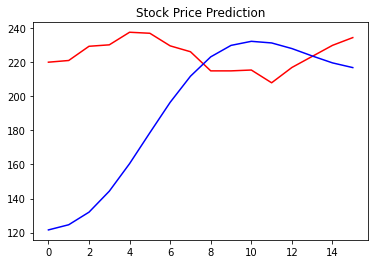

In [ ]:
plt.plot(stock_price, color = 'red', label = 'Test Stock Price')
plt.plot(pred_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')

<h1><b><u>Conclusion :</u></b></h1><h3>1. We extract opening stock price column from NSE-TATAGLOBAL.csv dataset and convert it into nparray to preprocess it and then creating a function to get last 60 days stock data (in form of a list) into a list as the x_train and the 61st stock price as the y_train. <br>2. We make a LSTM model with 4 LSTM layers with a Dropout layer and 1 output neuron that predicts the 61st day stock price. We compile the model having optimizer as adam and loss as mean_squared_error. We then train the model with epochs = 20 and batch_size = 32.<br>3. We extract opening stock price column from tatatest.csv dataset and we concatinate the test and train dataset, then we take last 60 days data preprocess it and we predict the values and then plot test stock price and predicted stock price</h3>

Recurrent neural network using LSTM is used to predict stock prices of the market.<br>
Prediction is based on stock prices of last 60 days.
Proposed model shows that loss of 0.0020 is acheived for 20 epochs.
